<a href="https://colab.research.google.com/github/zephyrstorm123/MO-IT134-MachineLearning/blob/main/Milestone_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE LEARNING ACTIVITY


##Costumer Transactions -Tone

###Access Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Exploratory Procedure of Data

In [ ]:
#Load Data

transaction_df = pd.read_csv("/content/drive/MyDrive/MO-IT134 - Machine Learning and Predictive Analytics/customer_transactions_contaminated.csv")

In [ ]:
transaction_df.iloc[31]

,31
CustomerID,36d99323-1a8b-45ed-bd7d-30b948e29684
TransactionID,434a98c5-5b2d-4f93-92fa-edf8b0fd3d6e
TransactionDate,2024-01-04 00:00:00
Amount,905.02
ProductCategory,Automotive
PaymentMethod,PayPal


In [ ]:
print("Dataset Overview:")
print(transaction_df.info())
print("First 5 rows of the dataset:")
print(transaction_df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       3015 non-null   object        
 1   TransactionID    3015 non-null   object        
 2   TransactionDate  2961 non-null   datetime64[ns]
 3   Amount           3015 non-null   float64       
 4   ProductCategory  3015 non-null   object        
 5   PaymentMethod    3015 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 164.9+ KB
None
First 5 rows of the dataset:
                             CustomerID                         TransactionID  \
0  60567026-f719-4cd6-849e-137e86d8938f  5ff75116-0a50-4d04-80fb-31e5ccbb0769   
1  4090ba85-b111-4f75-a792-c777965f5255  2c39b9fe-ff57-4d39-9321-9f5cdf187aa1   
2  9223891b-73ff-4d5c-b8ae-13ece82ee28b  f79588dd-3db9-4ffa-97f8-7de0e64259f1   
3  9243eebc-938f-480c-8564

###Check/Processing of Missing Values

In [ ]:
#Check the missing values within the data
missing_values = transaction_df.isnull().sum()
print(missing_values)

CustomerID           0
TransactionID        0
TransactionDate      0
Amount             304
ProductCategory    299
PaymentMethod        0
dtype: int64


In [ ]:
#Filling Up Missing Data for Product Category (Categorical Data)
transaction_df["ProductCategory"].fillna("Unknown", inplace=True)

<ipython-input-71-03ab5c09b6c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transaction_df["ProductCategory"].fillna("Unknown", inplace=True)


###Checking/Removing Duplicate Values

In [ ]:
transaction_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3153,False
3157,False
3164,False
3174,False


In [ ]:
transaction_df.duplicated().sum()

185

In [ ]:
transaction_df.drop_duplicates(inplace=True)

In [ ]:
#Check the changes in the table
transaction_df
print("Transaction Info")
print(transaction_df.info())

Transaction Info
<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3015 non-null   object
 1   TransactionID    3015 non-null   object
 2   TransactionDate  3015 non-null   object
 3   Amount           2732 non-null   object
 4   ProductCategory  3015 non-null   object
 5   PaymentMethod    3015 non-null   object
dtypes: object(6)
memory usage: 164.9+ KB
None


In [ ]:
#Converting "Amount" to numeric
transaction_df["Amount"] = pd.to_numeric(transaction_df["Amount"], errors="coerce")
#Filling Up Missing Data for Amount
transaction_df["Amount"].fillna(transaction_df["Amount"].mean(), inplace=True)
transaction_df["Amount"] = transaction_df["Amount"].round(2)

<ipython-input-74-dbcc488a4356>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transaction_df["Amount"].fillna(transaction_df["Amount"].mean(), inplace=True)


In [ ]:
#Count the number of missing data post process
missing_values = transaction_df.isnull().sum()
print(missing_values)

CustomerID         0
TransactionID      0
TransactionDate    0
Amount             0
ProductCategory    0
PaymentMethod      0
dtype: int64


<Axes: >

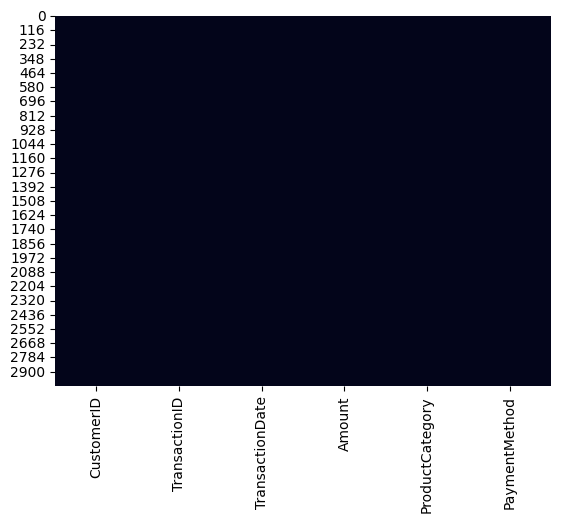

In [ ]:
import seaborn as sns

sns.heatmap(transaction_df.isnull(), cbar=False)

In [ ]:
#plot the amount column in a graph

plt.figure(figsize=(10, 6))
sns.histplot(transaction_df['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Standarize Format of Date

def convert_date(date):
  formats = [
      '%d%m%Y',      # Format: DDMMYYYY
      '%Y-%m-%d',    # Format: YYYY-MM-DD
      '%m/%d/%Y',    # Format: MM/DD/YYYY
      '%d-%m-%Y'     # Format: DD-MM-YYYY
  ]

  for fmt in formats:
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      continue

  return pd.NaT  # Return NaT if no valid format is found



In [ ]:
transaction_df['TransactionDate'] = transaction_df['TransactionDate'].apply(convert_date)

In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       3015 non-null   object        
 1   TransactionID    3015 non-null   object        
 2   TransactionDate  2961 non-null   datetime64[ns]
 3   Amount           3015 non-null   float64       
 4   ProductCategory  3015 non-null   object        
 5   PaymentMethod    3015 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 164.9+ KB


In [ ]:
transaction_df["TransactionDate"]

,TransactionDate
0,2024-05-15
1,2023-04-26
2,2022-09-23
3,2024-04-15
4,2024-06-03
...,...
3153,2023-12-05
3157,2022-10-08
3164,NaT
3174,2023-10-09


In [ ]:
#List all row id that has Nan as entry in transactionDate
transaction_df[transaction_df['TransactionDate'].isnull()].index

Index([  31,   94,  106,  121,  124,  238,  252,  258,  356,  389,  402,  431,
        437,  469,  506,  531,  563,  606,  626,  668,  683,  735,  751,  789,
        868,  875,  879,  887,  945,  946, 1006, 1016, 1051, 1077, 1081, 1094,
       1123, 1161, 1230, 1261, 1268, 1271, 1343, 1403, 1423, 1447, 1522, 1611,
       1655, 1670, 1735, 1763, 1784, 1833, 1840, 1879, 1909, 1920, 1940, 1947,
       1950, 2014, 2019, 2084, 2100, 2137, 2145, 2146, 2232, 2342, 2371, 2379,
       2388, 2392, 2424, 2468, 2557, 2586, 2602, 2634, 2639, 2666, 2672, 2676,
       2690, 2693, 2700, 2733, 2814, 2845, 2849, 2868, 2941, 2953, 2954, 3105,
       3157, 3164],
      dtype='int64')

###Encoding Categorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5])], remainder='passthrough')
transformed_transaction_df = pd.DataFrame(ct.fit_transform(transaction_df))

In [ ]:
transformed_transaction_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,59f8afe5-173b-4e52-b641-f98183f1a891,3121df10-58e5-4ed4-a05c-b1f12df6bcc7,2023-01-18,892.44
3196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,16d0b561-279d-4da9-9aa8-8c5906dff79a,dff4f636-2c55-4237-8c55-efb15b05949b,2024-02-13,431.64
3197,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34e3f558-622e-4d6b-8d5d-07ab632e1b95,db0a4640-ea96-4fcd-989b-b71ba767529c,2022-12-26,490.92
3198,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,d83178cf-653d-435c-a7e8-880361dec6e7,89a1c0bc-4d49-4913-bb0f-26bd56b46a34,2022-09-26,343.46


In [ ]:
#Restore the column names after encoding


In [ ]:
missing_values = transaction_df.isnull().sum()
print(missing_values)

CustomerID          0
TransactionID       0
TransactionDate    98
Amount              0
ProductCategory     0
PaymentMethod       0
dtype: int64


In [ ]:
#Save changes to dataset
transaction_df.to_csv("/content/drive/MyDrive/MO-IT134 - Machine Learning and Predictive Analytics/customer_transactions_cleaned.csv", index=False)
transformed_transaction_df.to_csv("/content/drive/MyDrive/MO-IT134 - Machine Learning and Predictive Analytics/customer_transactions_OHE.csv", index=False)

##Social Media Interactions Contaminated-Lizette

In [ ]:
from google.colab import files
uploaded = files.upload()

Mounted at /content/drive


###Import Dependencies

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
#load data
social_media_df = pd.read_csv("/content/drive/MyDrive/MO-IT134 - Machine Learning and Predictive Analytics/social_media_interactions_contaminated.csv")
#social_media_df = pd.read_csv("/content/social_media_interactions_contaminated.csv")


In [86]:
print("Dataset Overview:")
print(social_media_df.info())
print("First 5 rows of the dataset:")
print(social_media_df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3200 non-null   object
 1   InteractionID    3200 non-null   object
 2   InteractionDate  3200 non-null   object
 3   Platform         2889 non-null   object
 4   InteractionType  3200 non-null   object
 5   Sentiment        2871 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB
None
First 5 rows of the dataset:
                             CustomerID                         InteractionID  \
0  2dcb9523-356b-40b2-a67b-1f27797de261  e5d15761-d0a7-4329-89e3-79a892c56097   
1  e12c37b3-7d4d-472f-9fd8-0df2cb3001aa  02f9f376-70ae-4fcd-9070-1db977939948   
2  08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2  a83fa04c-f109-4f24-8ce1-2078154f6a1c   
3  efdfdfc9-5dbb-4478-911a-101a390a0285  28a69c4b-a2e4-4c74-a130-1132d7733fdf   
4  ca1e90f6-0e5f-492e-ab92-252ff540

In [93]:
social_media_df

,CustomerID,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,2dcb9523-356b-40b2-a67b-1f27797de261,e5d15761-d0a7-4329-89e3-79a892c56097,2023-07-11,NaN,Comment,NaN
1,e12c37b3-7d4d-472f-9fd8-0df2cb3001aa,02f9f376-70ae-4fcd-9070-1db977939948,2023-07-06,Twitter,Share,NaN
2,08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2,a83fa04c-f109-4f24-8ce1-2078154f6a1c,2024-05-24,Instagram,Comment,Neutral
3,efdfdfc9-5dbb-4478-911a-101a390a0285,28a69c4b-a2e4-4c74-a130-1132d7733fdf,2023-11-01,Instagram,Like,Neutral
4,ca1e90f6-0e5f-492e-ab92-252ff540da18,d9d1c6f8-5e15-4738-b52b-13c2982420cc,2023-07-08,Instagram,Like,NaN
...,...,...,...,...,...,...
3195,8d8fe8bd-2009-4a15-be37-83dba3cef447,2212803c-4a00-4263-bae5-aaaff6d6bdb1,2023-08-30,Instagram,Like,Neutral
3196,1756838b-8368-4852-b4a5-32a23643a3dd,2f50ca57-f930-4d3e-ae08-9f3b26c7f148,2024-06-16,Facebook,Like,Neutral
3197,eb8bb3ce-e182-4a9c-8084-c55c738815e1,ee2c3d14-248c-48b0-aa80-4ea97e449bf8,2023-12-22,Instagram,Comment,Negative
3198,a5d08a95-9dba-4e3d-b997-1cfdde6a89ef,e77a8713-fdc7-4f71-85f8-9cd88cca0c42,2023-11-01,Twitter,Share,Positive


###Check/Processing of Missing Values

In [87]:
#Check the missing values within the data
missing_values = social_media_df.isnull().sum()
print(missing_values)

CustomerID           0
InteractionID        0
InteractionDate      0
Platform           311
InteractionType      0
Sentiment          329
dtype: int64


In [88]:
#Filling Up the Missing Data for Product Category (Categorical Data)
social_media_df["Platform"].fillna("Unknown", inplace=True)

<ipython-input-88-6edcbb0544f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  social_media_df["Platform"].fillna("Unknown", inplace=True)


In [90]:
# Convert "Sentiment" to numeric
social_media_df["Sentiment"] = pd.to_numeric(social_media_df["Sentiment"], errors="coerce")
# Filling Up Missing Data for Sentiment
social_media_df["Sentiment"].fillna(social_media_df["Sentiment"].mean(), inplace=True)

<ipython-input-90-264ff5d808a2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  social_media_df["Sentiment"].fillna(social_media_df["Sentiment"].mean(), inplace=True)


In [91]:
print (social_media_df['Sentiment'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3195   NaN
3196   NaN
3197   NaN
3198   NaN
3199   NaN
Name: Sentiment, Length: 3200, dtype: float64


In [ ]:
#Count the number of missing data post process
missing_values = social_media_df.isnull().sum()
print(missing_values)

CustomerID            0
InteractionID         0
InteractionDate       0
Platform              0
InteractionType       0
Sentiment          3200
dtype: int64


<Axes: >

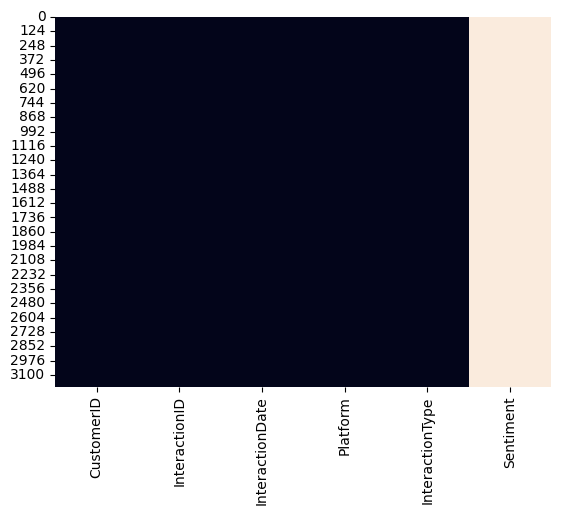

In [ ]:
import seaborn as sns

sns.heatmap(social_media_df.isnull(), cbar=False)

In [ ]:
# Standardize the format of the date
social_media_df['InteractionDate'] = pd.to_datetime(
    social_media_df['InteractionDate'], errors='coerce', dayfirst=False
)

# Format 'InteractionDate' as 'YYYY-MM-DD'
social_media_df['InteractionDate'] = social_media_df['InteractionDate'].dt.strftime('%Y-%m-%d')


In [ ]:
social_media_df["InteractionDate"]

,InteractionDate
0,2023-07-11
1,2023-07-06
2,2024-05-24
3,2023-11-01
4,2023-07-08
...,...
3195,2023-08-30
3196,2024-06-16
3197,2023-12-22
3198,2023-11-01


In [ ]:
social_media_df

,CustomerID,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,2dcb9523-356b-40b2-a67b-1f27797de261,e5d15761-d0a7-4329-89e3-79a892c56097,2023-07-11,Unknown,Comment,NaN
1,e12c37b3-7d4d-472f-9fd8-0df2cb3001aa,02f9f376-70ae-4fcd-9070-1db977939948,2023-07-06,Twitter,Share,NaN
2,08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2,a83fa04c-f109-4f24-8ce1-2078154f6a1c,2024-05-24,Instagram,Comment,NaN
3,efdfdfc9-5dbb-4478-911a-101a390a0285,28a69c4b-a2e4-4c74-a130-1132d7733fdf,2023-11-01,Instagram,Like,NaN
4,ca1e90f6-0e5f-492e-ab92-252ff540da18,d9d1c6f8-5e15-4738-b52b-13c2982420cc,2023-07-08,Instagram,Like,NaN
...,...,...,...,...,...,...
3195,8d8fe8bd-2009-4a15-be37-83dba3cef447,2212803c-4a00-4263-bae5-aaaff6d6bdb1,2023-08-30,Instagram,Like,NaN
3196,1756838b-8368-4852-b4a5-32a23643a3dd,2f50ca57-f930-4d3e-ae08-9f3b26c7f148,2024-06-16,Facebook,Like,NaN
3197,eb8bb3ce-e182-4a9c-8084-c55c738815e1,ee2c3d14-248c-48b0-aa80-4ea97e449bf8,2023-12-22,Instagram,Comment,NaN
3198,a5d08a95-9dba-4e3d-b997-1cfdde6a89ef,e77a8713-fdc7-4f71-85f8-9cd88cca0c42,2023-11-01,Twitter,Share,NaN


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
transformed_social_media_df = pd.DataFrame(ct.fit_transform(social_media_df))

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [ ]:
transformed_social_media_df

NameError: name 'transformed_social_media_df' is not defined

In [ ]:
#restore the column names after encoding

In [ ]:
missing_values = social_media_df.isnull().sum()
print(missing_values)

0       0
1       0
2       0
3       0
4       0
5     100
6       0
7    3200
dtype: int64


## Customer Demographics -Phil

In [ ]:
import pandas as pd

customer_df = pd.read_csv('/content/drive/MyDrive/MO-IT134 - Machine Learning and Predictive Analytics/customer_demographics_contaminated.csv')

###Exploratory Procedure

In [ ]:
customer_df

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24
...,...,...,...,...,...,...
3195,bbf7c36f-3745-4d3a-9e33-f927c2755f65,45.0,Female,Roberttown,Medium,2023-02-17
3196,0ef84cc6-0b4c-4c56-bdaa-d6b725ccc08e,40.0,Male,Lisaside,Medium,2022-07-23
3197,0ede97d1-bb46-452d-893e-b63f37da4fa8,NaN,Female,North Christinaport,High,2021-10-16
3198,43ec68f5-4305-4b40-8ced-a187d00bb3f5,26.0,Female,Carrilloport,Low,2022-09-26


###Removing Duplicated Values

In [ ]:
customer_df.isnull().sum()

,0
CustomerID,0
Age,291
Gender,0
Location,0
IncomeLevel,303
SignupDate,0


In [ ]:
customer_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3195,False
3196,True
3197,True
3198,True


In [ ]:
customer_df.duplicated().sum()

177

In [ ]:
duplicates = customer_df[customer_df.duplicated()]
duplicates

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
3000,89ae8d7c-cbcd-4117-8a06-d7ddc5fa9132,45.0,Female,Port Joseph,Low,2020-02-12
3001,0b5275cc-0b6c-4451-ac40-469e74c35f00,33.0,Female,Port Aliceton,High,2024-05-09
3002,b3dd8e85-02ff-4345-b148-e76de51adf54,NaN,Female,North Jessicaport,Low,2022-10-01
3003,dc8ac42f-4293-467b-8e8e-84706eba4be4,30.0,Male,New Travis,Low,2024-02-09
3005,2b5f6d15-acf4-4c88-8711-6fb1b1ad9334,53.0,Female,Alanton,High,2021-11-02
...,...,...,...,...,...,...
3194,40c2909d-983b-4c95-a737-2022acba98ee,28.0,Male,Josephborough,High,2020-02-14
3196,0ef84cc6-0b4c-4c56-bdaa-d6b725ccc08e,40.0,Male,Lisaside,Medium,2022-07-23
3197,0ede97d1-bb46-452d-893e-b63f37da4fa8,NaN,Female,North Christinaport,High,2021-10-16
3198,43ec68f5-4305-4b40-8ced-a187d00bb3f5,26.0,Female,Carrilloport,Low,2022-09-26


In [ ]:
customer_df.drop_duplicates(inplace=True)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 0 to 3195
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   3023 non-null   object
 1   Age          2747 non-null   object
 2   Gender       3023 non-null   object
 3   Location     3023 non-null   object
 4   IncomeLevel  2738 non-null   object
 5   SignupDate   3023 non-null   object
dtypes: object(6)
memory usage: 165.3+ KB


###Filling Up Missing Data

In [ ]:
#Filling Up Numerical Daata

customer_df['Age'] = pd.to_numeric(customer_df['Age'], errors='coerce')

customer_df['Age'] = customer_df['Age'].fillna(customer_df['Age'].mean()).round(0)

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 0 to 3195
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   3023 non-null   object 
 1   Age          3023 non-null   float64
 2   Gender       3023 non-null   object 
 3   Location     3023 non-null   object 
 4   IncomeLevel  2738 non-null   object 
 5   SignupDate   3023 non-null   object 
dtypes: float64(1), object(5)
memory usage: 165.3+ KB


In [ ]:
customer_df['IncomeLevel'] = customer_df['IncomeLevel'].fillna('Unknown')

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 0 to 3195
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   3023 non-null   object        
 1   Age          3023 non-null   float64       
 2   Gender       3023 non-null   object        
 3   Location     3023 non-null   object        
 4   IncomeLevel  3023 non-null   object        
 5   SignupDate   2968 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 165.3+ KB


In [ ]:
customer_df['SignupDate'] = customer_df['SignupDate'].apply(convert_date)

In [ ]:
customer_df

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,45.0,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,Unknown,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24
...,...,...,...,...,...,...
3165,48313b18-ccdb-4946-b958-1ebfc92dcc2a,59.0,Male,South Andrea,High,2020-02-26
3178,bbe76a26-234f-4a70-b71f-fa9b183f6353,45.0,Male,Gregoryfurt,High,2020-06-23
3183,7eb7f7df-9b0a-416a-829e-bcf4d8bd57dc,55.0,Male,New Anthonyland,High,2022-07-23
3186,ce5cf079-859b-43fa-9609-c6bb7e12c6b7,41.0,Female,Adrianhaven,Low,2024-01-10


#Merging All Tables

In [ ]:
merged_tables = pd.merge(transaction_df, customer_df, on='CustomerID', how='inner')

In [ ]:
merged_tables

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod,Age,Gender,Location,IncomeLevel,SignupDate
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal,37.0,Male,Port Eric,High,2022-03-09
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer,23.0,Male,West Scotttown,Medium,2021-02-11
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card,46.0,Female,Sherriburgh,Low,2022-04-22
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal,40.0,Female,Gomezview,High,2021-08-05
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer,41.0,Female,Nicoleview,Medium,2021-11-15
...,...,...,...,...,...,...,...,...,...,...,...
3040,086370e7-8884-47d7-89b0-776401a43e1c,652636b6-5c72-44e1-aefb-6adce412ee75,2023-12-05,974.25,Electronics,Debit Card,53.0,Female,Port Jesseside,Medium,2024-04-19
3041,7c7df909-aa25-48c7-af9d-6ebe714b28b6,eb26a4f4-5af2-4e25-b1f2-fd0de5583f7b,2022-10-08,50.07,Automotive,Bank Transfer,23.0,Female,South Anthonystad,Low,2020-06-23
3042,79fc606a-c02c-4c39-b065-3e88a59b366c,7fbe5cc4-a35e-4e8e-89d7-7b439659b9f6,NaT,272.68,Clothing,Debit Card,34.0,Female,Johnsonburgh,Medium,2019-07-10
3043,6a84f1a7-f636-4300-bd8d-c7f888460829,185ee140-348a-4461-bd40-07a7e8535815,2023-10-09,0.00,Health & Beauty,PayPal,21.0,Female,East Marcushaven,Medium,2023-06-19
